<h1> Testing the GRU with various inputs

In [1]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import CuDNNGRU,CuDNNLSTM,LSTM, Bidirectional, GlobalMaxPool1D, Dropout,GRU
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
max_features = 20000
maxlen = 200

In [4]:
train = pd.read_csv("train.csv")
list_sentences_train = train["comment_text"].values

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))

In [5]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [6]:
def BiGRU_model():
    embed_size = 128
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(CuDNNGRU(64, return_sequences=True,name='Bidirectional_GRU_Layer'),merge_mode='sum')(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

model = BiGRU_model()

file_path = "BGRU.model.hdf5"

#Load previously obtained weights
model.load_weights(file_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<h3> Entering input sentence

In [144]:
test1=input('')

 you are a fool


In [145]:
df = pd.DataFrame({'comment_text': [test1]})
df.to_csv('example.csv',index=False)
test1=pd.read_csv('example.csv')
test1=test1['comment_text'].values
tokens=tokenizer.texts_to_sequences(test1)
X_t = sequence.pad_sequences(tokens, maxlen=maxlen)

In [146]:
out=model.predict(X_t)

In [93]:
out

array([[0.44572136, 0.00076184, 0.03323278, 0.00480109, 0.05397333,
        0.00790838]], dtype=float32)

<h3> Toxicity Results of the given sentence




Given sentence : ['you are a fool'] 

Toxic level:98.76%
Severe toxicity level:1.81%
Obscene level:40.65%
Threat level:0.81%
Insult level:79.06%
Identity Hate level:8.32%


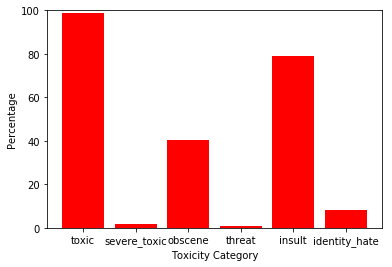

In [147]:
labels=out[0,0:6]
labels=labels*100
points=[1,2,3,4,5,6]
plt.bar(points,labels,tick_label=list_classes,color=['red'])
axes=plt.gca()
axes.set_ylim([0,100])
plt.xlabel('Toxicity Category')
plt.ylabel('Percentage')

print('\n')
print('\nGiven sentence :',test1,'\n')
print(f'Toxic level:{out[0,0]*100:.2f}%')
print(f'Severe toxicity level:{out[0,1]*100:.2f}%')
print(f'Obscene level:{out[0,2]*100:.2f}%')
print(f'Threat level:{out[0,3]*100:.2f}%')
print(f'Insult level:{out[0,4]*100:.2f}%')
print(f'Identity Hate level:{out[0,5]*100:.2f}%')